# Import Libraries

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler
from scipy.cluster.vq import kmeans,vq
from scipy.cluster.hierarchy import fcluster,linkage
from scipy.stats.mstats import winsorize
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'imblearn'

### Merge train and test to apply feature engineering
- As test doesn't have a target column

In [4]:
df=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')
df_pred=pd.DataFrame()
df_both=pd.concat([df,df_test], ignore_index=True)
df_both

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100.0,160.0,1.6000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,20.0,83.0,4.1500,1.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0
2,99.0,150.0,1.5151,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,40.0,40.0,1.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,12.0,234.0,19.5000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2515,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2516,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2517,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [5]:
df.shape,df_test.shape,df_both.shape

((1763, 1559), (756, 1558), (2519, 1559))

In [6]:
df_both.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Columns: 1559 entries, feature_1 to Class
dtypes: float64(5), int64(1554)
memory usage: 30.0 MB


# Outliers Resample

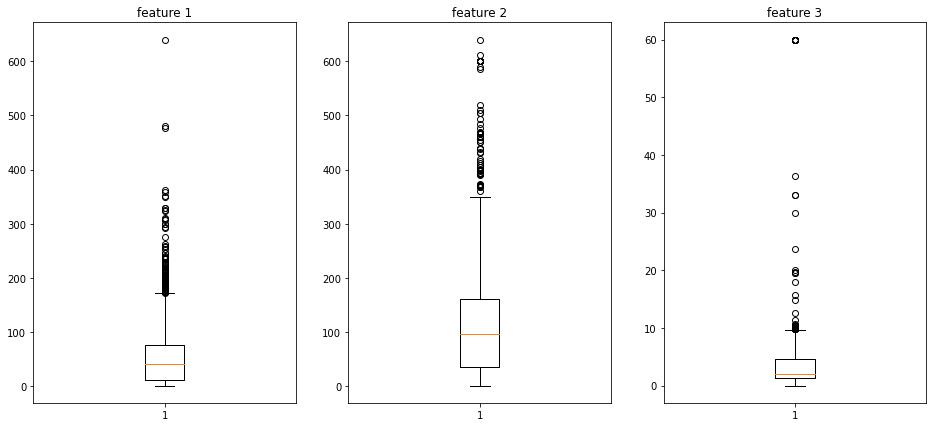

In [7]:
fig, axs =  plt.subplots(1,3,figsize = (16,7))
for i in range(3):
    axs[i].set_title(f'feature {i+1}')
    axs[i].boxplot(df_both[f'feature_{i+1}'])

In [8]:
for col in df_both.columns[:3]:
    l=0.1 if col=='feature_2' else 0.05
    df_both[col]=winsorize(df_both[col],limits=l)
df_both

NameError: name 'winsorize' is not defined

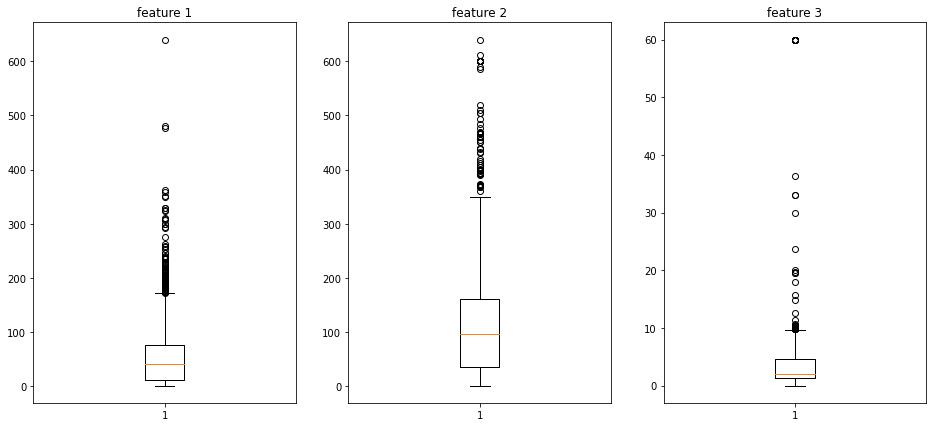

In [9]:
fig, axs =  plt.subplots(1,3,figsize = (16,7))
for i in range(3):
    axs[i].set_title(f'feature {i+1}')
    axs[i].boxplot(df_both[f'feature_{i+1}'])

# Standard scale first 3 features

In [10]:
df2=pd.DataFrame(StandardScaler().fit_transform(df_both.iloc[:,:3]),columns=df_both.columns[:3])
df_both=pd.concat([df2,df_both.iloc[:,3:]],axis=1)
df_both

NameError: name 'StandardScaler' is not defined

# Separate Them again

In [11]:
df=df_both[:df.shape[0]]
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100.0,160.0,1.6000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,20.0,83.0,4.1500,1.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0
2,99.0,150.0,1.5151,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,40.0,40.0,1.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,12.0,234.0,19.5000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1.0,1.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1759,40.0,200.0,5.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1760,96.0,218.0,2.2708,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1761,16.0,81.0,5.0625,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [12]:
df_test=df_both[df.shape[0]+1:].iloc[:,:-1].reset_index(drop=True)
df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,125.0,125.0,1.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
751,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Imbalanced :)

In [13]:
df.Class.value_counts()

0.0    1620
1.0     143
Name: Class, dtype: int64

# OverSampling

In [14]:
def over_sample_train_test(x,y):
    ros=RandomOverSampler(random_state=0)
    ros.fit(x,y)
    x_res,y_res=ros.fit_resample(x,y)
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state = 1)
    return x_train,x_test,y_train,y_test

x=df.drop('Class',axis=1)
y=df.Class
x_train,x_test,y_train,y_test=over_sample_train_test(x,y)

NameError: name 'RandomOverSampler' is not defined